health insurance dataset.

1. **Age**
- What: Age of the primary insurance beneficiary
- Type: Numeric variable
- Relevance: Age is typically a key factor in determining insurance premiums

2. **Sex**
- What: Gender of the insurance contractor
- Categories: Female, Male
- Type: Categorical variable (binary)

3. **BMI (Body Mass Index)**
- What: Measure of body weight relative to height
- Formula: weight (kg) / height² (m²)
- Healthy range: 18.5 to 24.9
- Type: Numeric variable
- Relevance: Important health indicator that can affect insurance costs

4. **Children**
- What: Number of dependents covered by the insurance
- Type: Integer variable
- Represents: Number of children/dependents on the policy

5. **Smoker**
- What: Smoking status of the beneficiary
- Type: Categorical variable (binary)
- Relevance: Major factor in determining insurance premiums due to health risks

6. **Region**
- What: Beneficiary's residential area in the US
- Categories: Northeast, Southeast, Southwest, Northwest
- Type: Categorical variable
- Relevance: Geographic location can affect insurance costs due to regional variations in healthcare costs

7. **Charges**
- What: Individual medical costs billed by health insurance
- Type: Numeric variable (likely continuous)
- Target variable: This is typically what the dataset is used to predict or analyze

This dataset is commonly used for:
- Analyzing factors that influence insurance costs
- Building predictive models for insurance pricing
- Understanding the relationship between personal characteristics and medical charges
- Studying regional variations in healthcare costs


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import ( LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ( RandomForestRegressor, GradientBoostingRegressor)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from scipy import stats
import requests
import pickle
import joblib
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')








# Create directories for saving models and plots
os.makedirs('saved_models', exist_ok=True)
os.makedirs('plots', exist_ok=True)

In [3]:

# shared link
shared_link = 'https://drive.google.com/file/d/118TIGf4njURpvcPFIKKAym1-sVO18DAC/view?usp=sharing'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('insurance.csv', 'wb') as f:
    f.write(response.content)
data=pd.read_csv('insurance.csv')
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:

# 1. Data Description and Information
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Dataset Description:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.6

In [5]:

# 2. Check for null values
print("\nNull Values:")
print(data.isnull().sum())



Null Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [6]:

# 3. Data Preprocessing
# Convert categorical variables to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])


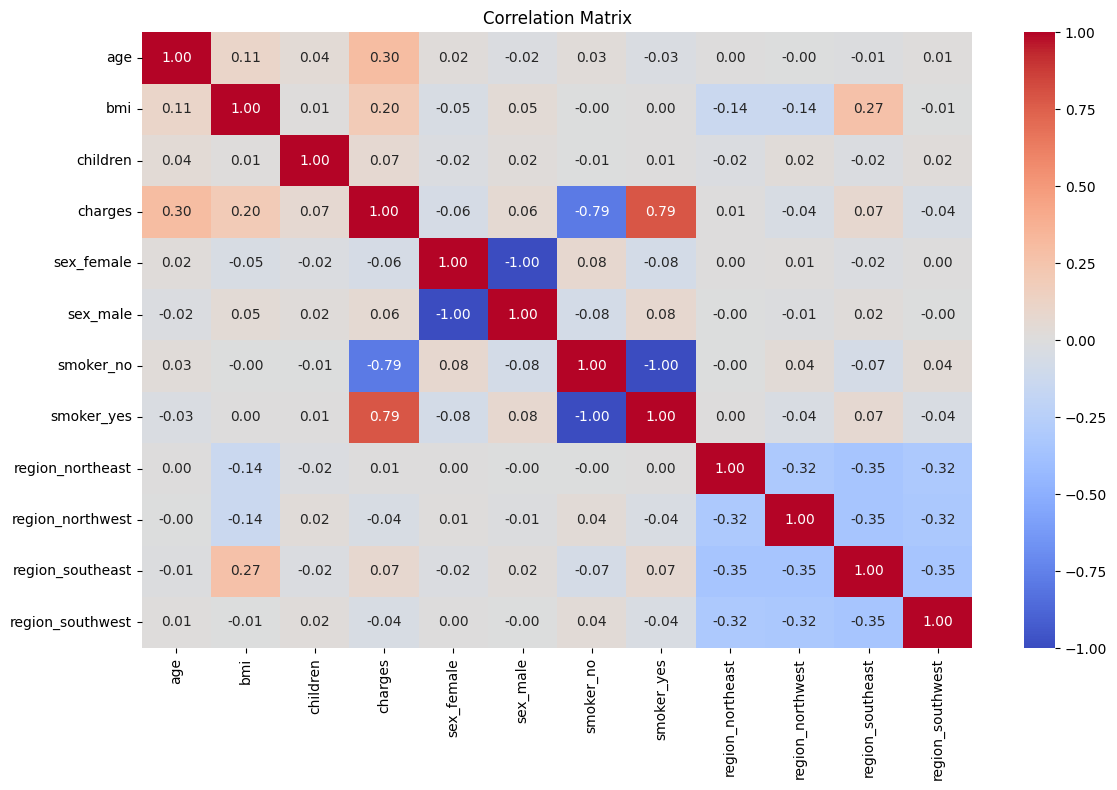

In [7]:

# 4. Correlation Analysis and Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()
plt.close()


In [8]:

# Separate features (X) and target variable (y)
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

# Feature scaling with  RobustScaler()
scaler_X = RobustScaler()
X_scaled = scaler_X.fit_transform(X)

# Scale the target variable with RobustScaler
scaler_y = RobustScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

joblib.dump(scaler_X, 'feature_scaler.joblib')
joblib.dump(scaler_y, 'target_scaler.joblib')

['target_scaler.joblib']

In [9]:

# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [10]:


# Create polynomial features for polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False,interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)



In [11]:
# Dictionary of regression models
models = {
    'XGBoost Regression': XGBRegressor(colsample_bytree=0.9, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, reg_alpha=0.01, reg_lambda=0.1, subsample=0.8, random_state=42),
    'Random Forest Regression': RandomForestRegressor(max_depth=10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 10, n_estimators= 200, random_state=42),
    'Neural Network Regression': MLPRegressor(hidden_layer_sizes=(150, 75, 50), activation='relu', solver='adam', alpha=0.001, batch_size='auto', learning_rate='adaptive', max_iter=1000, early_stopping=True, random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(learning_rate= 0.01, max_depth= 4, min_samples_leaf= 1, min_samples_split= 6, n_estimators= 200, subsample= 0.8, random_state=42),
    'Support Vector Regression (SVR)': SVR( epsilon= 0.1, gamma= 'scale', kernel= 'linear'),
    # Updated this line to pass parameters to the inner regressor and transformer correctly
    'Quantile Regression': TransformedTargetRegressor(regressor=GradientBoostingRegressor(learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8, random_state=42),  transformer=QuantileTransformer(output_distribution='normal', n_quantiles=500) ),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='auto', leaf_size=30, p=2),
    'Polynomial Regression': LinearRegression(fit_intercept=True, n_jobs=-1),
    'Decision Tree Regression': DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=4, max_features='sqrt', random_state=42),
    'Ridge Regression': Ridge(alpha=0.5, solver='auto', fit_intercept=True, random_state=42),
    'Linear Regression': LinearRegression(fit_intercept=True, n_jobs=-1),
    'Elastic Net Regression': ElasticNet(alpha= 0.1, l1_ratio= 0.1, max_iter= 2000, random_state=42),
    'Lasso Regression': Lasso(alpha=0.001, fit_intercept=True, max_iter=2000, random_state=42),
    'Bayesian Ridge Regression': BayesianRidge( alpha_1=1e-6, alpha_2=1e-6, lambda_1=1e-6, lambda_2=1e-6, fit_intercept=True),
    'Generalized Additive Models': GaussianProcessRegressor( kernel=RBF(length_scale=0.5),  alpha=1.0,n_restarts_optimizer=2,random_state=42)
}

In [12]:

# Dictionary to store results
results = {}

def plot_feature_importance(model, name, feature_names):
    """Plot feature importance if the model supports it"""
    plt.figure(figsize=(10, 6))

    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.title(f'Feature Importances ({name})')
        plt.bar(range(len(importances)), importances[indices])
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
        plt.tight_layout()
        plt.savefig(f'plots/feature_importance_{name.replace(" ", "_").lower()}.png')
        plt.close()

        # Return feature importance as dictionary
        return dict(zip(feature_names, importances))

    elif hasattr(model, 'coef_'):
        coefficients = model.coef_
        if coefficients.ndim > 1:  # For polynomial regression
            coefficients = np.mean(np.abs(coefficients), axis=0)

        plt.title(f'Feature Coefficients ({name})')
        plt.bar(range(len(coefficients)), np.abs(coefficients))
        plt.xticks(range(len(coefficients)), feature_names, rotation=45)
        plt.tight_layout()
        plt.savefig(f'plots/feature_coefficients_{name.replace(" ", "_").lower()}.png')
        plt.close()

        # Return coefficients as dictionary
        return dict(zip(feature_names, np.abs(coefficients)))

    return None




In [13]:
# Train and evaluate models with batch processing for Gaussian Process Regressor
for name, model in models.items():
    print(f"\nTraining {name}...")

    # Use polynomial features for polynomial regression, scaled features for others
    if name == 'Polynomial Regression':
        X_train_use = X_train_poly
        X_test_use = X_test_poly
        feature_names = [f"Poly_{i}" for i in range(X_train_poly.shape[1])]
    else:
        X_train_use = X_train
        X_test_use = X_test
        feature_names = X.columns.tolist()


    # Train other models normally
    model.fit(X_train_use, y_train)

    # Save the model
    joblib.dump(model, f'saved_models/{name.replace(" ", "_").lower()}.joblib')


    # Make predictions
    y_pred_train_scaled = model.predict(X_train_use)
    y_pred_test_scaled = model.predict(X_test_use)


    # Transform predictions back to original scale
    y_pred_train =scaler_y.inverse_transform(y_pred_train_scaled.reshape(-1, 1)).ravel()
    y_train_original = scaler_y.inverse_transform(y_train.reshape(-1, 1)).ravel()

    # Transform predictions back to original scale
    y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).ravel()
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

    # Calculate metrics
    results[name] = {
        'Train R2': r2_score(y_train_original, y_pred_train),
        'Test R2': r2_score(y_test_original, y_pred_test),
        'Train RMSE': np.sqrt(mean_squared_error(y_train_original, y_pred_train)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test_original, y_pred_test)),
        'Train MAE': mean_absolute_error(y_train_original, y_pred_train),
        'Test MAE': mean_absolute_error(y_test_original, y_pred_test)
    }

    # Get feature importance or coefficients
    importance = plot_feature_importance(model, name, feature_names)
    if importance:
        results[name]['Feature Importance'] = importance

print("Training and evaluation completed.")



Training XGBoost Regression...

Training Random Forest Regression...

Training Neural Network Regression...

Training Gradient Boosting Regression...

Training Support Vector Regression (SVR)...

Training Quantile Regression...

Training K-Nearest Neighbors Regression...

Training Polynomial Regression...

Training Decision Tree Regression...

Training Ridge Regression...

Training Linear Regression...

Training Elastic Net Regression...

Training Lasso Regression...

Training Bayesian Ridge Regression...

Training Generalized Additive Models...
Training and evaluation completed.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [14]:

# Create a DataFrame with results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
results_df[['Train R2', 'Test R2', 'Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']].round(4).sort_values(by='Test R2', ascending=False)



Model Performance Comparison:


,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
XGBoost Regression,0.880849,0.881701,4146.993847,4285.533227,2296.923019,2444.632202
Neural Network Regression,0.858466,0.870236,4519.742884,4488.393404,2698.370763,2660.429483
Polynomial Regression,0.838443,0.863671,4828.887751,4600.536686,2938.578259,2743.91813
Random Forest Regression,0.90745,0.863412,3654.867112,4604.896917,2170.368838,2812.77253
Quantile Regression,0.848179,0.862121,4681.116659,4626.604648,2418.953976,2348.7605
Gradient Boosting Regression,0.864941,0.861367,4415.15829,4639.24552,2935.487399,3048.872228
Generalized Additive Models,0.836755,0.854537,4854.043474,4752.154599,3032.61423,2998.039172
K-Nearest Neighbors Regression,0.998308,0.798824,494.205984,5588.582045,29.572515,3357.805199
Linear Regression,0.741726,0.783593,6105.54516,5796.284659,4208.234572,4181.194474
Ridge Regression,0.741724,0.783516,6105.563361,5797.309379,4210.271806,4183.920474


In [15]:

# Example of making predictions on new data
def predict_insurance_cost(model_name, new_data):
    # Load the saved model and scaler
    model = joblib.load(f'saved_models/{model_name.replace(" ", "_").lower()}.joblib')
    scaler_y = joblib.load('target_scaler.joblib')
    scaler_X = joblib.load('feature_scaler.joblib')

      # Preprocess new data
    new_data_encoded = pd.get_dummies(new_data, columns=['sex', 'smoker', 'region'])

    # Get missing columns and add them with 0 values
    missing_cols = set(X.columns) - set(new_data_encoded.columns)
    for col in missing_cols:
        new_data_encoded[col] = 0

    # Reorder columns to match the original training data
    new_data_encoded = new_data_encoded[X.columns]



  # Scale the new data
    new_data_scaled = scaler_X.transform(new_data_encoded)


    # If using polynomial regression, transform the features
    if model_name == 'Polynomial Regression':
        new_data_scaled = poly.transform(new_data_scaled)

    # Make predictions
    predictions_scaled = model.predict(new_data_scaled)

     # Transform predictions back to original scale
    predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1)).ravel()


    return predictions


# Example usage of prediction function
# Create sample new data (using the same features as the diabetes dataset)
sample_new_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [25.0],
    'children': [2],
    'smoker': ['no'],
    'region': ['southeast']
}, index=[0]) # Added index to avoid future errors



# Make predictions using the best performing model
best_model = results_df.sort_values(by='Test R2', ascending=False).index[0]
prediction = predict_insurance_cost(best_model, sample_new_data)
print(f"\nPredicted Insurance Cost for Sample Data: {best_model}: {prediction[0]}")




Predicted Insurance Cost for Sample Data: XGBoost Regression: 7239.177734375


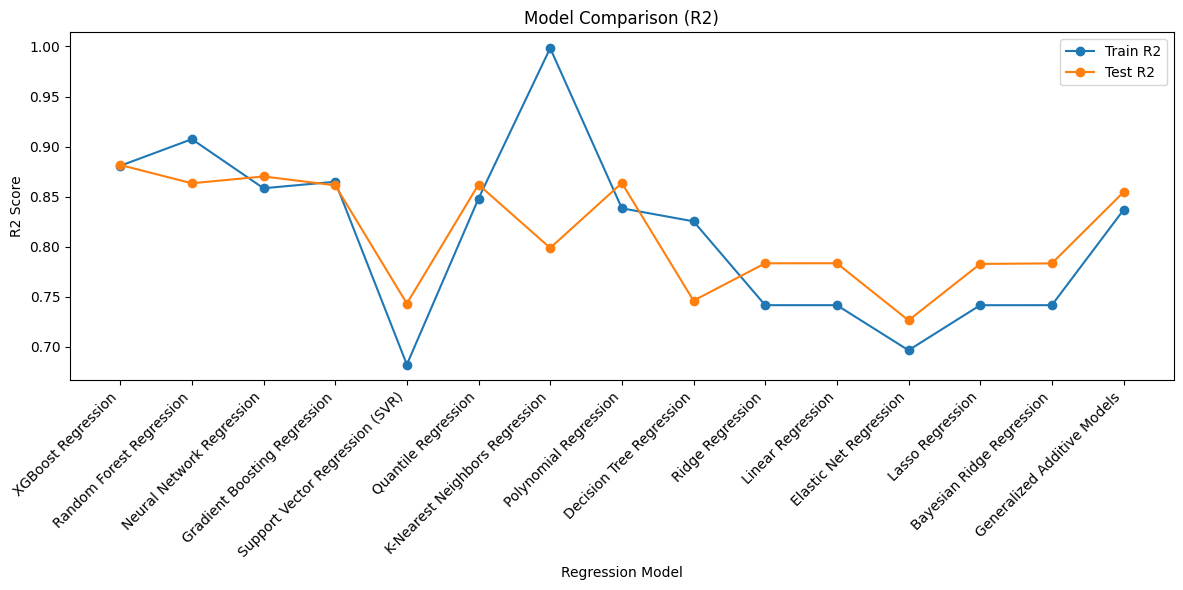

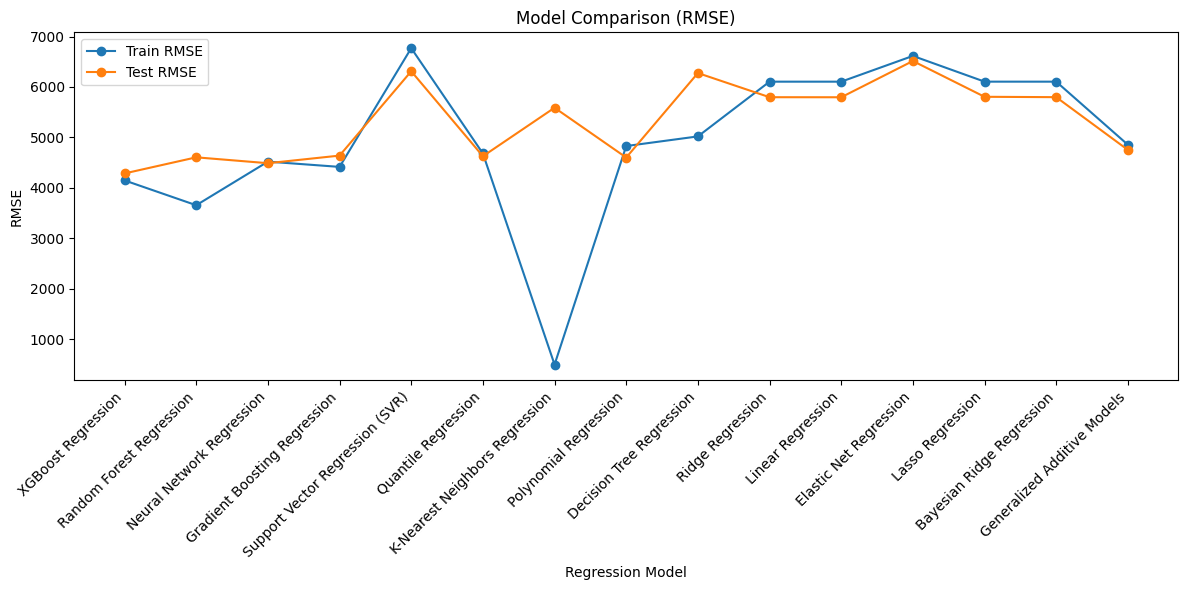

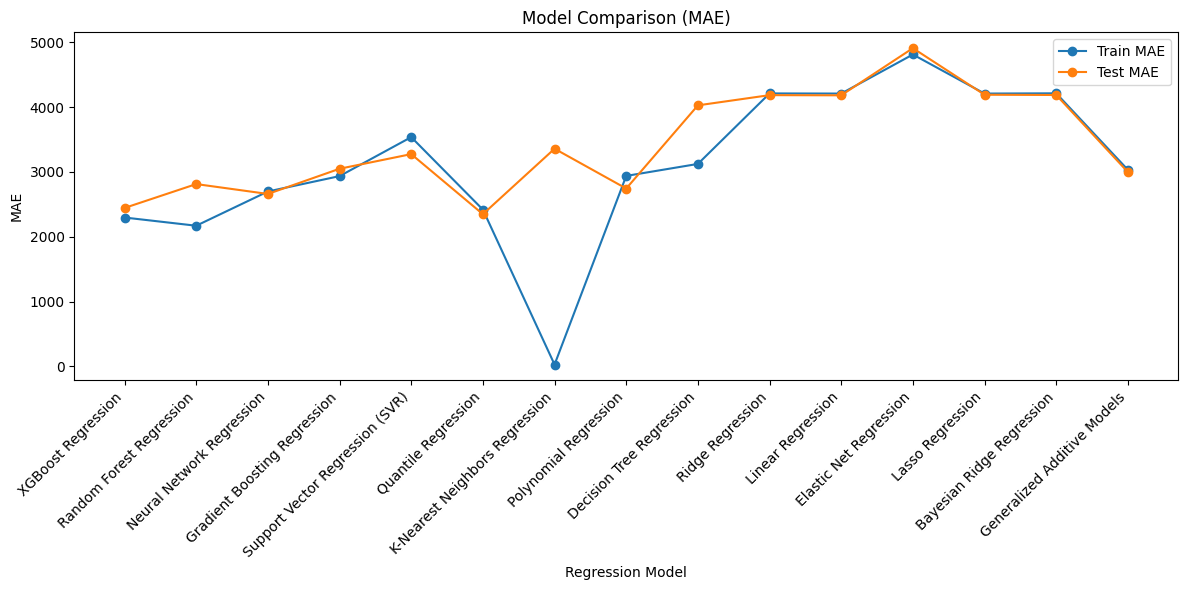

In [16]:

# Save results to CSV
results_df.to_csv('model_comparison_results.csv')

# Plot model comparison for R2 scores
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Train R2'], label='Train R2', marker='o')
plt.plot(results_df.index, results_df['Test R2'], label='Test R2', marker='o')
plt.xlabel('Regression Model')
plt.ylabel('R2 Score')
plt.title('Model Comparison (R2)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('plots/model_comparison_r2.png')
plt.show()
plt.close()


# Plot model comparison for RMSE scores
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Train RMSE'], label='Train RMSE', marker='o')
plt.plot(results_df.index, results_df['Test RMSE'], label='Test RMSE', marker='o')
plt.xlabel('Regression Model')
plt.ylabel('RMSE')
plt.title('Model Comparison (RMSE)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('plots/model_comparison_rmse.png')
plt.show()
plt.close()


# Plot model comparison for MAE scores
plt.figure(figsize=(12, 6))
plt.plot(results_df.index, results_df['Train MAE'], label='Train MAE', marker='o')
plt.plot(results_df.index, results_df['Test MAE'], label='Test MAE', marker='o')
plt.xlabel('Regression Model')
plt.ylabel('MAE')
plt.title('Model Comparison (MAE)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('plots/model_comparison_mae.png')
plt.show()
plt.close()

# ... (Rest of your code) ...

In [18]:

# Create an empty DataFrame to store predictions and actual values
predictions_df = pd.DataFrame()

# Iterate through saved models
for model_name in models.keys():
    # Load the saved model
    model = joblib.load(f'saved_models/{model_name.replace(" ", "_").lower()}.joblib')

    # Use polynomial features for polynomial regression, scaled features for others
    if model_name == 'Polynomial Regression':
        X_test_use = X_test_poly
    else:
        X_test_use = X_test


    # Make predictions
    y_pred_test_scaled = model.predict(X_test_use)
    y_pred_test = scaler_y.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).ravel()

    # Add predictions and actual values to the DataFrame
    predictions_df['Actual'] = y_test_original
    predictions_df[model_name] = y_pred_test


print("Prediction DataFrame")
predictions_df



Prediction DataFrame


,Actual,XGBoost Regression,Random Forest Regression,Neural Network Regression,Gradient Boosting Regression,Support Vector Regression (SVR),Quantile Regression,K-Nearest Neighbors Regression,Polynomial Regression,Decision Tree Regression,Ridge Regression,Linear Regression,Elastic Net Regression,Lasso Regression,Bayesian Ridge Regression,Generalized Additive Models
0,9095.06825,11415.676758,11425.437596,10858.854845,10954.944277,9273.500962,9004.737012,8995.034288,11429.505390,9103.387038,8973.658188,8969.550274,9520.314538,8926.188791,8977.116520,10856.426700
1,5272.17580,5867.300293,5382.969544,6056.277027,7030.063529,6174.813455,6448.949314,5682.674248,6843.403283,6749.423737,7075.255323,7068.747443,8588.848983,7041.819050,7080.735300,6633.979829
2,29330.98315,28109.628906,27255.435193,30911.596092,25435.899038,43178.688460,22355.525873,28271.619304,32047.718039,27749.720180,36820.159705,36858.410912,30893.320895,36731.211197,36787.989912,31508.403470
3,9301.89355,10382.777344,10652.413173,10927.777103,10580.938059,9266.725044,9088.987363,11437.130320,11021.508896,8628.797125,9460.209480,9454.678501,10136.289274,9411.297980,9464.862579,10461.513239
4,33750.29180,33807.742188,33627.229531,27400.592985,32373.461457,31604.334790,32200.708703,21147.115989,28500.536242,34472.578676,26952.933162,26973.173457,23778.861889,26898.598604,26935.909159,27448.974307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,47055.53210,46227.851562,44415.025696,44957.953714,42010.774318,43194.327563,42409.586196,46853.305555,45242.146695,38123.910550,39026.698604,39061.500932,32924.558735,39030.559528,38997.417941,43354.912238
264,12222.89830,12632.164062,12424.713414,13588.764760,13087.099058,11630.958936,11779.787670,14607.443394,12196.473431,14059.214286,11760.289659,11761.499198,11961.947502,11719.706170,11759.278863,12491.063956
265,6067.12675,7248.395020,6589.253727,7358.469359,8318.863475,6992.355600,7159.780606,6443.119374,7991.585671,8620.319227,7695.710189,7687.563632,8699.310673,7672.614444,7702.563323,7694.451559
266,63770.42801,46528.203125,42969.590484,51125.831208,41829.307660,42463.755967,43793.357439,39156.167724,59068.134676,38770.644030,40883.635636,40920.291512,34562.043635,40825.905038,40852.795839,43674.745794
